In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind , pearsonr ,chi2_contingency ,t
from sklearn.linear_model import LinearRegression 
import warnings
warnings.filterwarnings('ignore')

#pour les tableaux
import plotly.graph_objects as go

import folium
import re

In [2]:
#Chargement des modules d'analyse statistique
import sys
sys.path.append(r'C:\Users\dthem\NOTEBOOKS_python\MODULES_FONCTIONS')
import Fonction_impression_tableau_plotly as imptab
import Fonctions_analyse_statistique_univariée  as statuniv
import Fonctions_analyse_statistique_bivariée as statbiv

In [3]:
#Chargement des données et vérification des informations - fichier issu du notebook "meteo_4_construction de la base"
data_meteo=pd.read_csv(r"C:\DATA\meteo\data_meteo_traité.csv")
data_meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405421 entries, 0 to 405420
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID_station       405421 non-null  int64  
 1   Station          405421 non-null  object 
 2   Latitude         405421 non-null  float64
 3   Longitude        405421 non-null  float64
 4   Altitude         405421 non-null  int64  
 5   geometry         405421 non-null  object 
 6   Distance_Paris   405421 non-null  float64
 7   Date_jour        405421 non-null  object 
 8   Année            405421 non-null  int64  
 9   Numéro_mois      405421 non-null  int64  
 10  Mois             405421 non-null  object 
 11  Température_max  405421 non-null  float64
 12  Jours>30°C       405421 non-null  int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 40.2+ MB


In [4]:
#Nombre de stations et nombre de lignes
liste_stations=list(data_meteo["ID_station"].unique())
print("Le nombre de stations est:",len(liste_stations))
print("Nombre de lignes du du fichier data_meteo:",data_meteo.shape[0])



Le nombre de stations est: 40
Nombre de lignes du du fichier data_meteo: 405421


In [5]:
#Nombre d'années
nb_annees=len(np.unique(data_meteo["Année"]))
print("Nombre d'années",nb_annees)

Nombre d'années 28


In [6]:
#Conservation des infos de station dans un dataframe info_stations
info_stations=data_meteo[["ID_station","Station","Latitude","Longitude","Altitude","geometry"]].drop_duplicates()
info_stations=info_stations.reset_index(drop=True)

In [7]:
#Quelques transformations : suppression de la colonne geometry et 
#mise au format date de Date_jour, 
#mise au format objet de ID station , Année et numéro de mois
data_meteo=data_meteo.drop(["geometry"],axis=1)
data_meteo["Date_jour"]=pd.to_datetime(data_meteo["Date_jour"])
data_meteo["Date_jour"]=data_meteo["Date_jour"].apply(lambda x:x.date())
data_meteo["ID_station"]=data_meteo["ID_station"].astype("str")
data_meteo["Année"]=data_meteo["Année"].astype("str")
data_meteo["Numéro_mois"]=data_meteo["Numéro_mois"].astype("str")

In [8]:
#Vérifications
data_meteo.dtypes

ID_station          object
Station             object
Latitude           float64
Longitude          float64
Altitude             int64
Distance_Paris     float64
Date_jour           object
Année               object
Numéro_mois         object
Mois                object
Température_max    float64
Jours>30°C           int64
dtype: object

In [9]:
#Remarque la variable Jours>30°C sera utilisée en fin d'étude , en somme annuelle

In [10]:
data_meteo.head(5)

ID_station    Station  Latitude  Longitude  Altitude  Distance_Paris  \
0       7005  ABBEVILLE    50.136      1.834        69         146.972   
1       7005  ABBEVILLE    50.136      1.834        69         146.972   
2       7005  ABBEVILLE    50.136      1.834        69         146.972   
3       7005  ABBEVILLE    50.136      1.834        69         146.972   
4       7005  ABBEVILLE    50.136      1.834        69         146.972   

    Date_jour Année Numéro_mois      Mois  Température_max  Jours>30°C  
0  2023-12-01  2023          12  Décembre              1.8           0  
1  2023-12-02  2023          12  Décembre              2.6           0  
2  2023-12-03  2023          12  Décembre              3.4           0  
3  2023-12-04  2023          12  Décembre              7.3           0  
4  2023-12-05  2023          12  Décembre              6.9           0

In [11]:
# PARTIE A : statistiques globales
#Analyse univariée systématique de toutes les variables 
#Analyse bivariée

In [12]:
#Création des listes de variables quanti et quali
liste_quanti=['Latitude', 'Longitude', 'Altitude', 'Distance_Paris', 'Température_max']
liste_quali=['Station', 'Année', 'Mois']


In [13]:
#Analyse univariée des variables quanti
statuniv_quanti=statuniv.description_quanti(data_meteo,liste_quanti[0])
for var in liste_quanti:
    if var !=liste_quanti[0]:
        statuniv_quanti=pd.concat([statuniv_quanti,statuniv.description_quanti(data_meteo,var)],axis=0)


In [14]:
#Examen des résulats quanti
statuniv_quanti

Stat. descriptives  \
Variable                                                             
Latitude                     Latitude
count  405421.000000
mean...   
Longitude                   Longitude
count  405421.000000
mean...   
Altitude                     Altitude
count  405421.000000
mean...   
Distance_Paris          Distance_Paris
count   405421.000000
me...   
Température_max         Température_max
count    405421.000000
...   

                Graphiques distribution    Graphique Q-Q  \
Variable                                                   
Latitude               Figure(1200x600)  Figure(640x480)   
Longitude              Figure(1200x600)  Figure(640x480)   
Altitude               Figure(1200x600)  Figure(640x480)   
Distance_Paris         Figure(1200x600)  Figure(640x480)   
Température_max        Figure(1200x600)  Figure(640x480)   

                                              Test de Jarque-Berra  
Variable                                                            
Latitude             Jarque-Bera  P-value Significativité Norma...  
Longitude           Jarque-Bera  P-value Significativité Normal...  
Altitude             Jarque-Bera  P-value Significativité Norma...  
Distance_Paris      Jarque-Bera  P-value Significativité Normal...  
Température_max     Jarque-Bera  P-value Significativité Normal...

In [15]:
#Distribution de la variable température max

In [16]:
#Graphiques de la distributions
graphe00=statuniv_quanti["Graphiques distribution"]["Température_max"]
graphe00.savefig("meteo_graphe00")

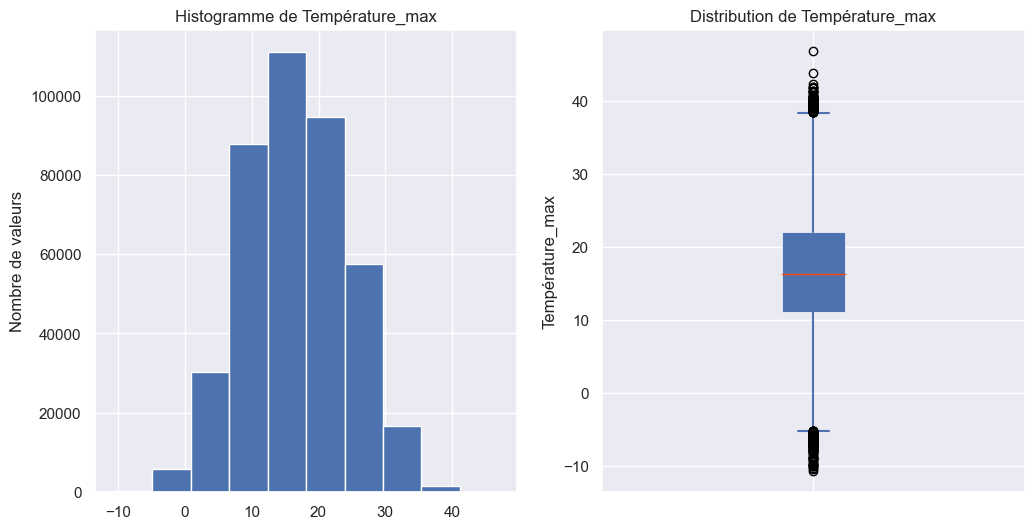

In [17]:
graphe00

In [18]:
#Résultat du test de normalité de Jarque-Berra
statuniv_quanti["Test de Jarque-Berra"]["Température_max"]

#Le test indique que la distribution n'est pas normale , ce que visualise le diagramme Q-Q ci-dessous

Jarque-Bera  P-value Significativité Normalité de la distribution
0  3080.799164      0.0             Oui                          Non

In [19]:
#Graphique Q-Q
graphe01=statuniv_quanti["Graphique Q-Q"]["Température_max"]
graphe01.savefig("meteo_graphe01")

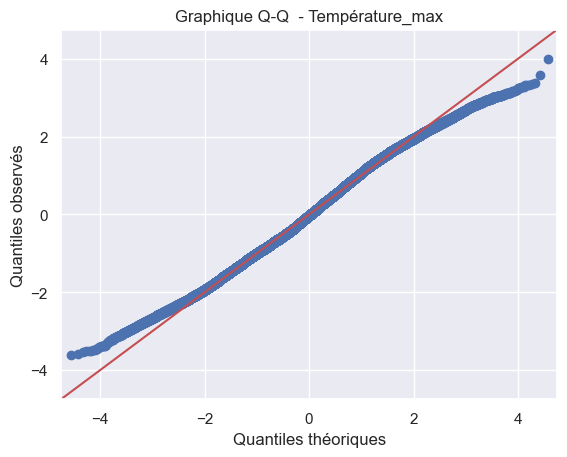

In [20]:
graphe01

In [21]:
#Analyse univariée des variables quali
statuniv_quali=statuniv.description_quali(data_meteo,liste_quali[0])
for var in liste_quali:
    if var !=liste_quali[0]:
        statuniv_quali=pd.concat([statuniv_quali,statuniv.description_quali(data_meteo,var)],axis=0)


In [22]:
#Examen des résultats quali

In [23]:
statuniv_quali

Table de fréquences  \
Variable                                                      
Station                   Station  Fréquence
0          ...   
Année        Année  Fréquence
0   1996      14521
1   19...   
Mois               Mois  Fréquence
0        Août      34...   

                                       Table de proportions        Graphique  
Variable                                                                      
Station                   Station  Proportion    IC_95- ...  Figure(640x480)  
Année        Année  Proportion    IC_95-    IC_95+
0   1...  Figure(640x480)  
Mois               Mois  Proportion    IC_95-    IC_95+
...  Figure(640x480)

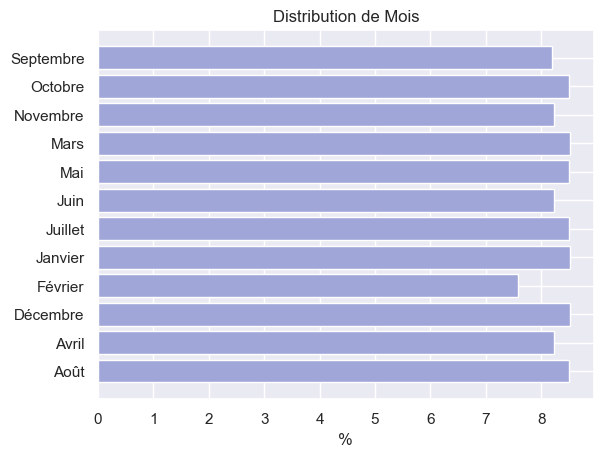

In [24]:
statuniv_quali["Graphique"]["Mois"]

In [25]:
#Analyse bivariées quanti
var1_init=liste_quanti[0]
var2_init=liste_quanti[1]
couple_init=var1_init+" & "+var2_init
statsbiv_quanti=statbiv.analyse_quanti_quanti(data_meteo,var1_init,var2_init)
for i in range(len(liste_quanti)-1):
    var1=liste_quanti[i]
    for j in range(i+1,len(liste_quanti)):
        var2=liste_quanti[j]
        couple=var1+" & "+var2
        if couple!=couple_init:
            statsbiv_quanti=pd.concat([statsbiv_quanti,statbiv.analyse_quanti_quanti(data_meteo,var1,var2)],axis=0)



In [26]:
#Affichage des cas avec une relation significative et modérée/forte/très forte en récupérant le type de test
for couple in list(statsbiv_quanti.index):
    df_test=statsbiv_quanti["Test de corrélation"][couple]
    if (df_test["Significativité"][0]=="Oui") & (df_test["Interprétation"][0] in (["Modérée","Forte","Très forte"])):
            print(couple," - ","Pearson"," - ",df_test["Interprétation"][0]," - ",df_test["Corrélation"][0])
    else :
        if (df_test["Significativité"][1]=="Oui") & (df_test["Interprétation"][1] in (["Modérée","Forte","Très forte"])):
            print(couple," - ","Spearman"," - ",df_test["Interprétation"][1]," - ",df_test["Corrélation"][1])
                    
        else: 
            if (df_test["Significativité"][2]=="Oui") & (df_test["Interprétation"][2] in (["Modérée","Forte","Très forte"])):
                print(couple," - ","Spearman"," - ",df_test["Interprétation"][2]," - ",df_test["Corrélation"][2])
                
#Aucun intérêt !

Latitude & Distance_Paris  -  Pearson  -  Très forte  -  -0.8629


In [27]:
#Affichage des corrélations avec la variable cible
var_cible="Température_max"
for couple in list(statsbiv_quanti.index):
    var=re.compile(" & ").split(couple)
    if (var[0]==var_cible)| (var[1]==var_cible):
        print(couple)
        print (statsbiv_quanti["Test de corrélation"][couple])
        print("\n")


Latitude & Température_max
       Type  Corrélation  P-value Interprétation Significativité
0   Pearson      -0.2113      0.0         Faible             Oui
1  Spearman      -0.2101      0.0         Faible             Oui
2   Kendall      -0.1408      0.0    Très faible             Oui


Longitude & Température_max
       Type  Corrélation  P-value Interprétation Significativité
0   Pearson       0.1015      0.0    Très faible             Oui
1  Spearman       0.0982      0.0    Très faible             Oui
2   Kendall       0.0655      0.0    Très faible             Oui


Altitude & Température_max
       Type  Corrélation  P-value Interprétation Significativité
0   Pearson      -0.0746      0.0    Très faible             Oui
1  Spearman      -0.0934      0.0    Très faible             Oui
2   Kendall      -0.0647      0.0    Très faible             Oui


Distance_Paris & Température_max
       Type  Corrélation  P-value Interprétation Significativité
0   Pearson       0.1892      0.0 

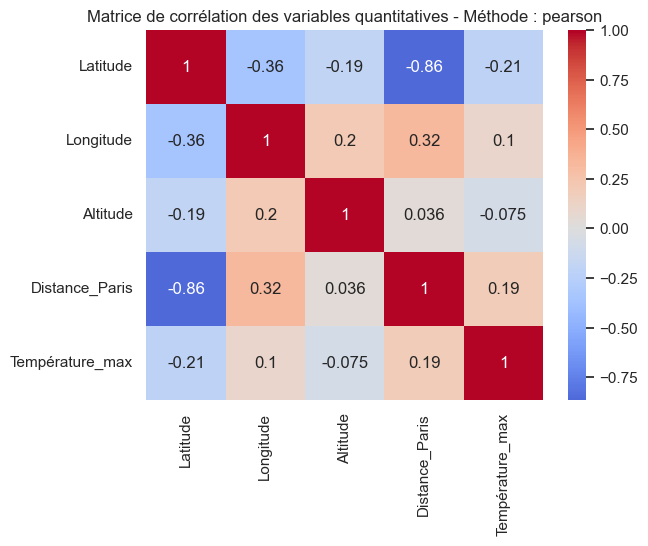

In [28]:
#Utilisation de la fonction heatmap
graphe02=statbiv.heatmap(data_meteo,liste_quanti,"pearson")
graphe02

In [29]:
#Enconclusion:
#Aucune forte corrélation entre les température max et une autre variable quanti
#la corrélation max est obtenue avec la Latitude : à savoir 0.21 ( méthode Pearson).Elle est significative

In [30]:
#Analyse bivariée quali_quanti
var1_init=liste_quali[0]
var2_init=liste_quanti[0]
couple_init=var1_init+" & "+var2_init
statsbiv_quali_quanti=statbiv.analyse_quali_quanti(data_meteo,var1_init,var2_init)
for i in range(len(liste_quali)):
    var1=liste_quali[i]
    for j in range(len(liste_quanti)):
        var2=liste_quanti[j]
        couple=var1+" & "+var2
        if couple!=couple_init:
            statsbiv_quali_quanti=pd.concat([statsbiv_quali_quanti,statbiv.analyse_quali_quanti(data_meteo,var1,var2)],axis=0)



In [31]:
statsbiv_quali_quanti

Stat. descriptives  \
Variables                                                                      
Station & Latitude                         Station    count       mean   ...   
Station & Longitude                        Station    count      mean    ...   
Station & Altitude                         Station    count   mean  std  ...   
Station & Distance_Paris                   Station    count     mean     ...   
Station & Température_max                  Station    count       mean   ...   
Année & Latitude              Année    count       mean       std     min...   
Année & Longitude             Année    count      mean       std    min  ...   
Année & Altitude              Année    count        mean         std  min...   
Année & Distance_Paris        Année    count        mean         std     ...   
Année & Température_max       Année    count       mean       std    min ...   
Mois & Latitude                     Mois    count       mean       std   ...   
Mois & Longitude                    Mois    count      mean       std    ...   
Mois & Altitude                     Mois    count        mean         std...   
Mois & Distance_Paris               Mois    count        mean         std...   
Mois & Température_max              Mois    count       mean       std   ...   

                                   Boxplot  \
Variables                                    
Station & Latitude         Figure(640x480)   
Station & Longitude        Figure(640x480)   
Station & Altitude         Figure(640x480)   
Station & Distance_Paris   Figure(640x480)   
Station & Température_max  Figure(640x480)   
Année & Latitude           Figure(640x480)   
Année & Longitude          Figure(640x480)   
Année & Altitude           Figure(640x480)   
Année & Distance_Paris     Figure(640x480)   
Année & Température_max    Figure(640x480)   
Mois & Latitude            Figure(640x480)   
Mois & Longitude           Figure(640x480)   
Mois & Altitude            Figure(640x480)   
Mois & Distance_Paris      Figure(640x480)   
Mois & Température_max     Figure(640x480)   

                                                             Test de Shapiro  \
Variables                                                                      
Station & Latitude                        Modalité  Effectif  Stat  p-val...   
Station & Longitude                       Modalité  Effectif  Stat  p-val...   
Station & Altitude                        Modalité  Effectif  Stat  p-val...   
Station & Distance_Paris                  Modalité  Effectif  Stat  p-val...   
Station & Température_max                 Modalité  Effectif      Stat   ...   
Année & Latitude              Modalité  Effectif      Stat  p-value Signi...   
Année & Longitude             Modalité  Effectif      Stat       p-value ...   
Année & Altitude              Modalité  Effectif      Stat  p-value Signi...   
Année & Distance_Paris        Modalité  Effectif      Stat       p-value ...   
Année & Température_max       Modalité  Effectif      Stat       p-value ...   
Mois & Latitude                 Modalité  Effectif      Stat  p-value Sig...   
Mois & Longitude                Modalité  Effectif      Stat  p-value Sig...   
Mois & Altitude                 Modalité  Effectif      Stat  p-value Sig...   
Mois & Distance_Paris           Modalité  Effectif      Stat  p-value Sig...   
Mois & Température_max          Modalité  Effectif      Stat       p-valu...   

                                                              Test de Levene  \
Variables                                                                      
Station & Latitude            Levene  p-value Significativité Egalité des...   
Station & Longitude           Levene  p-value Significativité Egalité des...   
Station & Altitude            Levene  p-value Significativité Egalité des...   
Station & Distance_Paris      Levene  p-value Significativité Egalité des...   
Station & Température_max         Levene  p-value Significativité Egalité

In [32]:
#Affichage des cas quali-quanti avec une relation significative et modérée/forte/très forte en récupérant le type de test
liste_couple=[]
test1=re.compile("Température_max")
test2=re.compile("Jours>30°C")
for couple in list(statsbiv_quali_quanti.index):
    if (test1.findall(couple)!=[]) | (test2.findall(couple)!=[]):
        df_test=statsbiv_quali_quanti["Test de comparaison"][couple]
        if df_test["Relation"][0] =="Oui":
            liste_couple.append(couple)
            print(couple," - ",df_test["Test réalisé"][0]," - ",df_test["Relation"][0]," - ",df_test["Normalité"][0]," - ",df_test["Egalité des var."][0])
    

Station & Température_max  -  Kruskal-Wallis  -  Oui  -  Non  -  Non
Année & Température_max  -  Kruskal-Wallis  -  Oui  -  Non  -  Non
Mois & Température_max  -  Kruskal-Wallis  -  Oui  -  Non  -  Non


In [33]:
#Au cours des analyses univariées on a constaté que la distribution de la température max n'était pas normale.
#On retrouve ce point lorsqu'on teste la normalité poar modalité des diffétentes variables qualitatives.De plus
#on observe qu'il n' y a pas égalité des variances.On ne peut donc pas utiliser les tests ANOVA ou student
#D'où le recours à des tests non paramétriques

In [34]:
#Conclusion des analyses quali-quanti
#Des relations significatives sont observées entre la variable cible Température max et et les 
#3 variables Station, Année,Mois.

In [35]:
#Analyse bivariée quali_quali

#Cela ne présente pas d'intérêt étant donnée la liste des variables

In [36]:
#Conclusion générale : il y a bien des relations entre la variable cible Temérature_max 
#et les 3 variables Station , Mois ,Année

In [37]:
# PARTIE B : Graphiques d'illustration des résultats de l'analyse statistique

In [38]:
#Paramètres généraux pour les graphiques
couleur_axes="dimgray"
couleur_texte="darkslategray"
couleur_boite="gainsboro"
liste_années=["1996","2005","2014","2023"]
liste_mois=["Jan","Fev","Mar","Avr","Mai","Juin","Juil","Août","Sep","Oct","Nov","Dec"]
liste_stations=["LILLE-LESQUIN","NANTES-BOUGUENAIS","DIJON-LONGVIC","MARIGNANE"]


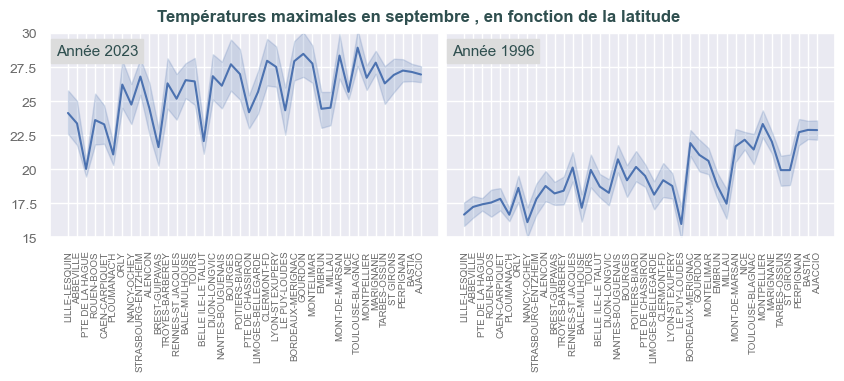

In [79]:
#Illustration de l'effet station sur température max en septembre
liste_années2=["1996","2023"]
df=data_meteo[(data_meteo["Mois"]=="Septembre")&(data_meteo["Année"].isin(liste_années2))]
df=df.sort_values(by="Latitude",ascending=False)

#Réactivation 1 fois de l'impression en ligne
with plt.ion():
    graph1 = sns.FacetGrid(df,  col="Année",col_wrap=2,aspect=1.5,despine=False,sharey=True,margin_titles=False)
    graph1.map(sns.lineplot,"Station","Température_max")
    graph1.figure.subplots_adjust(wspace=0.02, hspace=.2)
    graph1.set(ylim=(15, 30))

    graph1.set_xticklabels(color=couleur_axes,rotation=90,size=7)
    labely=[15,17.5,20,22.5,25,27.5,30]
    graph1.set_yticklabels(labels=labely,color=couleur_axes,size=10)
    graph1.set_ylabels("",color=couleur_texte,size=10)
    graph1.set_xlabels("")
    graph1.set_titles(col_template="Année {col_name}",color=couleur_texte,size=11,y=0.85,x=0.12,backgroundcolor=couleur_boite)
    plt.subplots_adjust(top=0.90)
    plt.suptitle("Températures maximales en septembre , en fonction de la latitude",size=12,color=couleur_texte,fontweight="bold");
    #graphe1
    graph1.savefig("meteo_graphe1")    

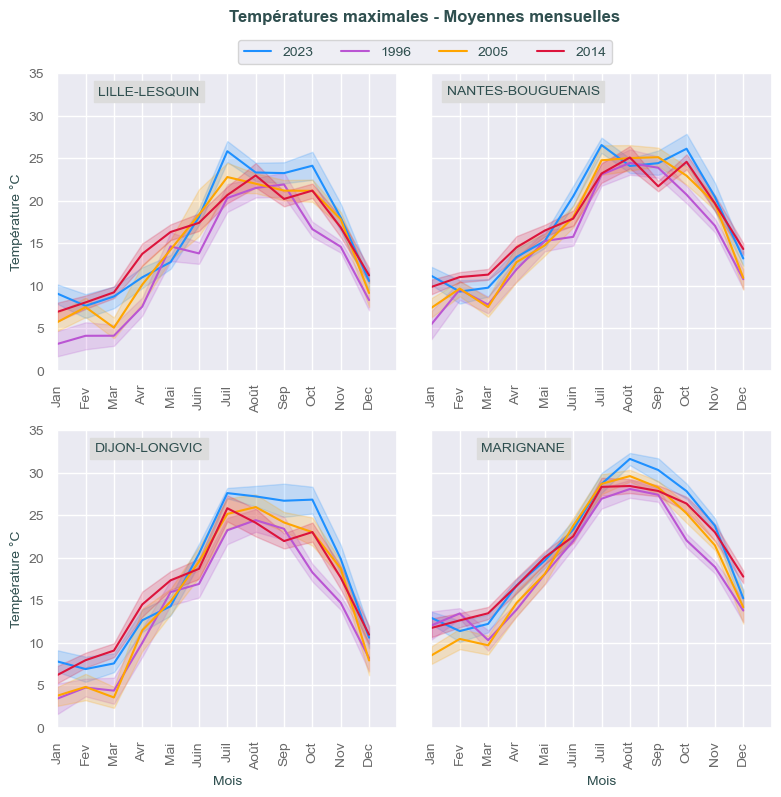

In [40]:
#Effet mois pour la liste de stations et d'années
#Illustration de la dépendance de température max versus mois
liste_couleurs=["dodgerblue","mediumorchid","orange","crimson"]
df=data_meteo[(data_meteo["Année"].isin(liste_années))&(data_meteo["Station"].isin(liste_stations))] 
graph2 = sns.FacetGrid(df,  col="Station",col_wrap=2,hue="Année",sharex=False,
                  palette=liste_couleurs,height=4,despine=False)

#coolwarm
graph2.map(sns.lineplot, "Mois", "Température_max")
graph2.figure.subplots_adjust(wspace=0.1, hspace=.2)
graph2.set( ylim=(0, 35),xlim=(1,12))
graph2.set_xticklabels(labels=liste_mois,rotation=90,color=couleur_axes,size=10)
labely=[0,5,10,15,20,25,30,35]
graph2.set_yticklabels(labels=labely,color=couleur_axes,size=10)
graph2.set_axis_labels("Mois","Température °C",color=couleur_texte,size=10)
graph2.set_titles(col_template="{col_name}",color=couleur_texte,size=10,backgroundcolor=couleur_boite,y=0.9, x=0.27)

graph2.add_legend()
sns.move_legend(graph2,"upper center",bbox_to_anchor=(.5, 0.95), ncol=4,
                frameon=True ,title=None,
                fontsize=10,labelcolor=couleur_texte,
               )
plt.subplots_adjust(top=0.90)
plt.suptitle("Températures maximales - Moyennes mensuelles",size=12,color=couleur_texte,fontweight="bold");
#graphe2
graph2.savefig("meteo_graphe2")    

In [41]:
#Examen du mois de juillet pour les 4 stations au cours des années
#Analyse corrélation des mois de juillet pour les 4 stations

df=data_meteo[(data_meteo["Station"].isin(liste_stations))&(data_meteo["Mois"]=="Juillet")] 
df["Année_num"]=df["Année"].astype("int64")
nom_station=[]
coeffcorr=[]
pval=[]
pente=[]
ordorig=[]
for nom in liste_stations: 
    var_cible=df[df["Station"]==nom]["Température_max"]
    var_test=df[df["Station"]==nom]["Année_num"]
    nom_station.append(nom)
    coeffcorr.append((pearsonr(var_cible,var_test)[0]).round(4))
    pval.append((pearsonr(var_cible,var_test)[1]).round(4))
    reg = LinearRegression()
    x=np.array(var_test).reshape(-1,1)
    y=np.array(var_cible).reshape(-1,1)
    reg.fit(x,y)
    pente.append((reg.coef_[0][0]).round(3))
    ordorig.append((reg.intercept_[0]).round(0))
    
corr_station=pd.DataFrame({"Station":nom_station,"correlation":coeffcorr,"p-value":pval,"pente":pente,
                           "ord. à l'origine":ordorig}) 

corr_station

Station  correlation  p-value  pente  ord. à l'origine
0      LILLE-LESQUIN       0.2075      0.0  0.105            -188.0
1  NANTES-BOUGUENAIS       0.1746      0.0  0.090            -156.0
2      DIJON-LONGVIC       0.2276      0.0  0.126            -228.0
3          MARIGNANE       0.2959      0.0  0.100            -170.0

In [42]:
#Export tableau 2
#Pour l'affichage les noms de stations sont raccourcis
tabl=imptab.impression_tableau(corr_station,"Corrélation entre Température max. et Année - Mois de juillet")
tabl.write_image("meteo_tableau2.png")

In [43]:
#Affichage
tabl

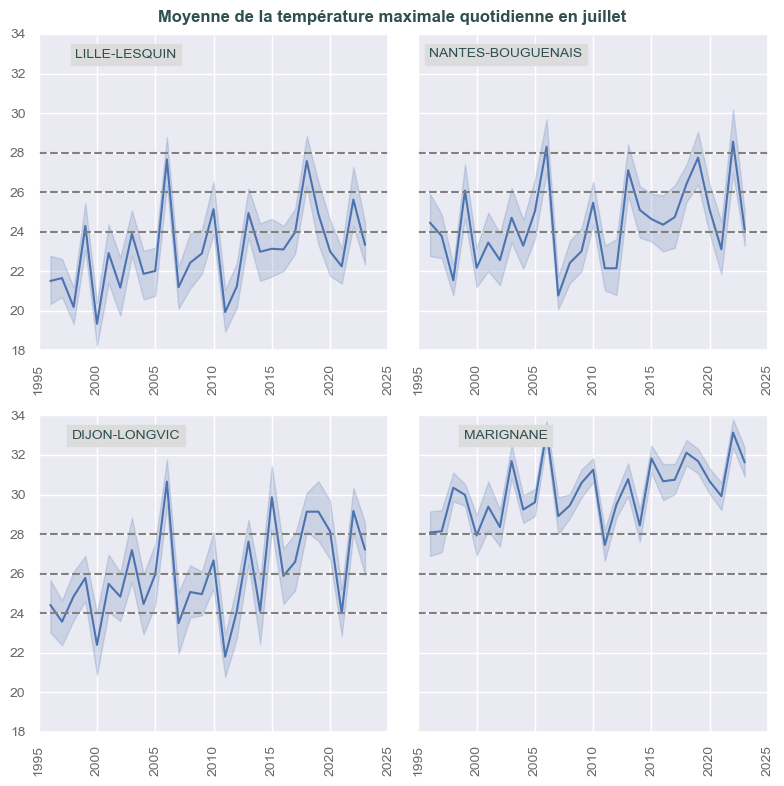

In [44]:
#Graphiques de la température maximale en juillet au cours des années
df=data_meteo[(data_meteo["Station"].isin(liste_stations))&(data_meteo["Mois"]=="Juillet")] 
df["Année_num"]=df["Année"].astype("int64")
graph3 = sns.FacetGrid(df,  col="Station",col_wrap=2,sharex=False,
                   margin_titles=True ,height=4,despine=False)
#graph3.map(sns.lineplot, "année", "pred",color="red")
graph3.map(sns.lineplot, "Année_num", "Température_max")
graph3.figure.subplots_adjust(wspace=0.2, hspace=.4)
graph3.set(xlim=(1996,2023),ylim=(18, 34))
labelx=[1995,2000,2005,2010,2015,2020,2025]

graph3.set_xticklabels(labels=labelx,rotation=90,color=couleur_axes,size=10)
labely=[18,20,22,24,26,28,30,32,34]
graph3.set_yticklabels(labels=labely,color=couleur_axes,size=10)
graph3.set_titles(col_template="{col_name}",color=couleur_texte,size=10,y=0.9,x=0.25,
               backgroundcolor=couleur_boite)
graph3.set_axis_labels("", "",color=couleur_texte,size=10)

graph3.refline(y=24)
graph3.refline(y=26)
graph3.refline(y=28)

plt.subplots_adjust(top=0.95)
plt.suptitle("Moyenne de la température maximale quotidienne en juillet",color=couleur_texte,size=12,fontweight="bold")
#graphe3
graph3.savefig("meteo_graphe3")  


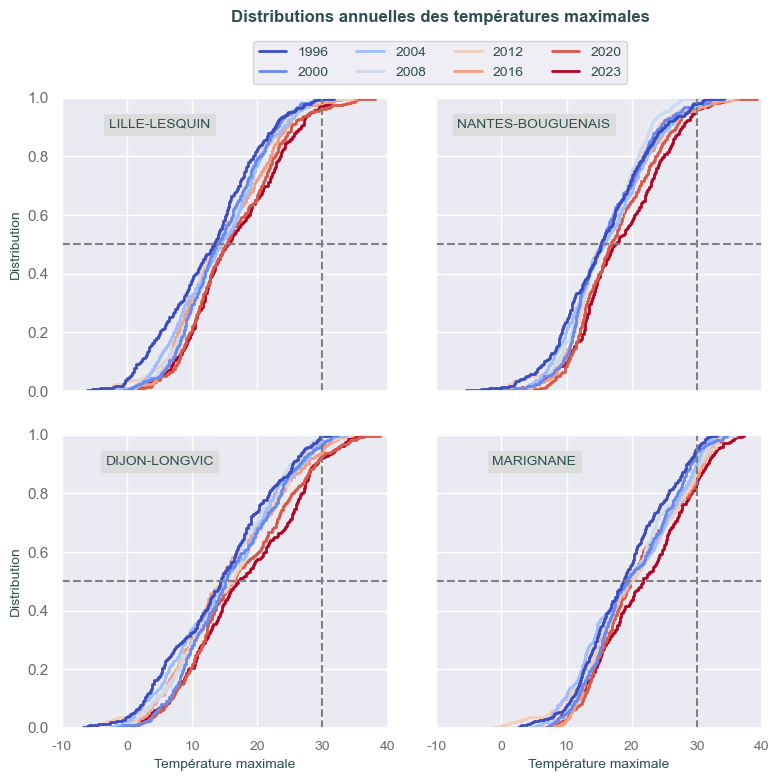

In [45]:
#Evolution de la distribution des températures max
#Distribution des températures maximales poour une sélection de 8 années et les 4 stations choisies
val_test=["1996","2000","2004","2008","2012","2016","2020","2023"]
var_cible="Température_max"

labely=[0.0,0.2,0.4,0.6,0.8,1.0]
labelx=[-10,0,10,20,30,40]

df=data_meteo[(data_meteo["Station"].isin(liste_stations))&(data_meteo["Année"].isin(val_test))]
df["Année_num"]=df["Année"].astype("int64") 

var_test="Année_num"  

graph4=sns.displot(data=df,x=var_cible,kind="ecdf", hue="Année_num",col="Station",col_wrap=2,
            height=4,aspect=1,palette="coolwarm",linewidth=2,
            facet_kws={ "despine":False }                
            )
graph4.refline(y=0.5,x=30)
graph4.figure.subplots_adjust(wspace=0.15, hspace=0.15)
graph4.set(xlim=(-10, 40),ylim=(0,1))
graph4.set_xticklabels(labels=labelx,color=couleur_axes,size=10)
graph4.set_yticklabels(labels=labely,color=couleur_axes)
plt.title("")
graph4.set_titles(col_template="{col_name}",color=couleur_texte,size=10,y=0.87,x=0.3,backgroundcolor=couleur_boite)
graph4.set_axis_labels("Température maximale", "Distribution",color=couleur_texte,size=10)
sns.move_legend(graph4,"upper center",bbox_to_anchor=(.5, 0.95), ncol=4,
                frameon=True ,title=None,
                fontsize=10,labelcolor=couleur_texte,
               )
plt.subplots_adjust(top=0.87)
plt.suptitle("Distributions annuelles des températures maximales",color=couleur_texte,size=12,fontweight="bold")

#graphe 4
graph4.savefig("meteo_graphe4")     

In [46]:
#On note un glissement des distributions vers les températures plus élevées:

# premier axe : l'évolution de la moyenne des distributions et la quantification des écarts , 

# deuxième axe : l'évolution du nombre de jours à plus de 30°C au cours des années , queue de la distribution


In [47]:
# AXE1 : écart moyenne - Cartographie travail sur l'écart 1996-2023

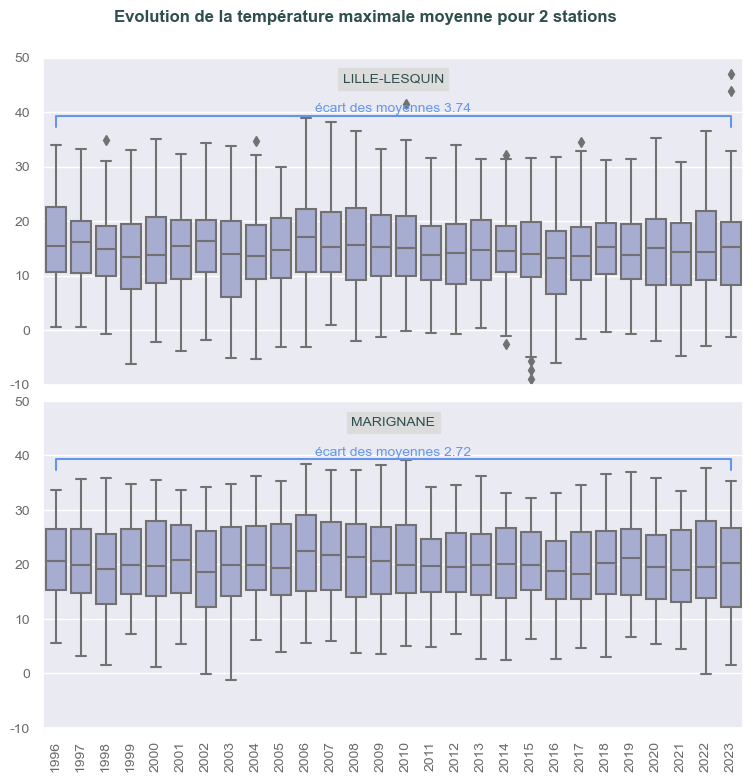

In [48]:
#Graphique d'évolution des écarts pour 2 stations

liste_stations2=["LILLE-LESQUIN","MARIGNANE"]
ensemble_annees=np.unique(data_meteo["Année"])
var_cible="Température_max"
var_test="Année"  

df=data_meteo[data_meteo["Station"].isin(liste_stations2)]
df=df.sort_values(by="Latitude",ascending=False)
df["Année_num"]=df["Année"].astype("int64")

graph5 = sns.FacetGrid(df,  col="Station",col_wrap=1, margin_titles=True ,height=4,aspect=2,
                    sharex=True,sharey=True,despine=False)
graph5.map(sns.boxplot, "Année", "Température_max",color="#a0a7d8")

graph5.figure.subplots_adjust(wspace=0.1, hspace=0.05)
graph5.set(ylim=(-10, 50))
labely=[-10,0,10,20,30,40,50]
graph5.set_yticklabels(labels=labely,color=couleur_axes,size=10)
graph5.set_xticklabels(labels=ensemble_annees,color=couleur_axes,rotation=90,size=10)
graph5.set_titles(col_template="{col_name}",color=couleur_texte,y=0.90,size=10,backgroundcolor=couleur_boite)
graph5.set_axis_labels("","", color=couleur_texte,size=10)

for (col_val), ax in graph5.axes_dict.items():
    x1, x2 = 0, 27   # columns '1996' and '2023' 
    moy2023=df[(df["Année_num"]==2023) & (df["Station"]==col_val)][var_cible].mean()
    moy1996=df[(df["Année_num"]==1996) & (df["Station"]==col_val)][var_cible].mean()
    ecartmoy=(moy2023-moy1996).round(2)
    y, h, couleur_annot = df[df["Année_num"]==2023]['Température_max'].max() , 2, 'cornflowerblue'
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=couleur_annot)
    ax.text((x1+x2)*.5, y+h+0.2,"écart des moyennes "+ str(ecartmoy), ha='center', va='bottom', color=couleur_annot,size=10)  


plt.subplots_adjust(top=0.92)
plt.suptitle("Evolution de la température maximale moyenne pour 2 stations",color=couleur_texte,size=12,fontweight="bold")
#graphe 5
graph5.savefig("meteo_graphe5")  



In [49]:
#A reprendre : pour chaque station faire une analyse bivariée

var_cible="Température_max"
var_test="Année" 
val_test=["1996","2023"]

liste_toutes_stations=list(data_meteo["Station"].unique())
test=[]
for nom in liste_toutes_stations:
    df=data_meteo[(data_meteo["Année"].isin(val_test))&(data_meteo["Station"]==nom)]
    comparaison=statbiv.analyse_quali_quanti(df,var_test,var_cible)
    test.append(comparaison)


In [50]:
#Mise en forme d'un dataframe pour impression de tableau
#Création
df_ecart=pd.DataFrame(test[0])
for i in range(len(test)):
    if i>0:
        df_ecart=pd.concat([df_ecart,pd.DataFrame(test[i])],axis=0)

#Transformation ( initialement les variables sont en index)
df_ecart=df_ecart.reset_index(drop=False)
df_ecart["Variables"]=liste_toutes_stations
df_ecart=df_ecart.rename({"Variables":"Station"},axis=1)

In [51]:
#Ajout d'une colonne écart - Calcul pour chaque station à partir de la colonne "Stat. descriptives"
#Cette colonne contient un dataframe avec autant de lignes que de modalités de la variable qualitative : ici 2
#On prendra à chaque fois la colonne "mean" et on fera l'écart ligne 1 - ligne 0 ( 2023-2016)

nbStations=len(liste_toutes_stations)
df_ecart["Ecart entre moyennes"]=np.zeros(nbStations)
df_ecart["Test statistique"]=np.zeros(nbStations)
df_ecart["p-value"]=np.zeros(nbStations)
df_ecart["Significativité"]=np.zeros(nbStations)

for i in range(nbStations):
    moy1=df_ecart["Stat. descriptives"][i]["mean"][0]
    moy2=df_ecart["Stat. descriptives"][i]["mean"][1]
    df_ecart["Ecart entre moyennes"][i]=(moy2 - moy1).round(1)
    df_ecart["Test statistique"][i]=df_ecart["Test de comparaison"][i]["Test réalisé"][0]
    df_ecart["p-value"][i]=df_ecart["Test de comparaison"][i]["p-value"][0]
    df_ecart["Significativité"][i]=df_ecart["Test de comparaison"][i]["Significativité"][0]
    
#On conserve uniquement certaines colonnes    
    
df_ecart=df_ecart[["Station","Ecart entre moyennes","Test statistique","Significativité"]]  

In [52]:
#Description statistique succincte
df_ecart[["Ecart entre moyennes"]].describe()

#Les écarts des moyennes entre 1996 et 2023 , sont significatifs pour toutes les stations.
#La moyenne est 3.0°C

Ecart entre moyennes
count             40.000000
mean               3.025000
std                0.655059
min                1.700000
25%                2.600000
50%                2.900000
75%                3.400000
max                4.600000

In [53]:
#Export tableau 3 ( 5 plus gros écarts et 5 plus petits écarts)
df_ecart=df_ecart.sort_values(by=["Ecart entre moyennes"],ascending=False)
df_ecart_max=df_ecart.head(5)
df_ecart_min=df_ecart.tail(5)
df_tabl=pd.concat([df_ecart_max,df_ecart_min],axis=0)
df_tabl["classement"]=[1,2,3,4,5,36,37,38,39,40]
df_tabl["Station"]=df_tabl["Station"].apply(lambda x:x.split("-")[0])
tabl=imptab.impression_tableau(df_tabl,"5 plus forts et 5 plus faibles écarts 1996/2023 sur la moyenne de Température max.")
tabl.write_image("meteo_tableau3.png")
tabl


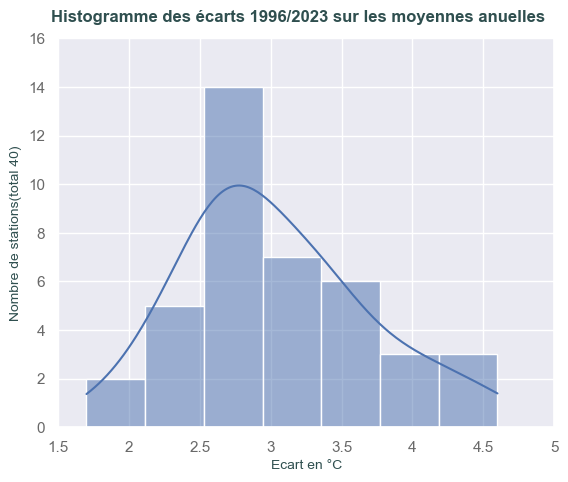

In [80]:
#Distribution des écarts

graph6, ax = plt.subplots()
sns.histplot(df_ecart["Ecart entre moyennes"],ax=ax ,kde=True)
ax.set(xlim=(1.5,5),ylim=(0,16))
labelx=[1.5,2,2.5,3,3.5,4,4.5,5]
ax.set_xticklabels(labels=labelx,color=couleur_axes)
labely=[0,2,4,6,8,10,12,14,16]
ax.set_yticklabels(labels=labely,color=couleur_axes)
ax.set_xlabel("Ecart en °C",color=couleur_texte,size=10)
ax.set_ylabel("Nombre de stations(total 40)",color=couleur_texte,size=10)
ax.set_title("",color=couleur_texte,size=11)

plt.subplots_adjust(top=0.92)
plt.suptitle("Histogramme des écarts 1996/2023 sur les moyennes anuelles",color=couleur_texte,size=12,fontweight="bold")
#graphe 6
graph6.savefig("meteo_graphe6")

In [55]:
#Préparation des données pour une carte des écarts entre 1996 et 2022

#Ajout d'une variable classe écart de température
nom_classes=["moins de 2°C","de 2 à 3°C","de 3 à 4°C","plus de 4°C"]
liste_classes=[-10,2,3,4,100]

df_ecart["Classe_écart"]=pd.cut(df_ecart["Ecart entre moyennes"],bins=liste_classes,
                                              labels=nom_classes) 

#Ajout des informations de station , nom , Latitude , Longitude,Altitude
df_ecart=df_ecart.merge(right=info_stations,on="Station",how="inner")


In [56]:
#Carte des écarts entre moyennes de 1996 et 2023
df_ecart=df_ecart[['ID_station','Station','Ecart entre moyennes', 'Classe_écart', 'Latitude', 'Longitude','Altitude']]

#Création du géo dataframe
df_ecart_geo=gpd.GeoDataFrame(df_ecart,geometry=gpd.points_from_xy(df_ecart["Longitude"],df_ecart["Latitude"]))                         
df_ecart_geo=df_ecart_geo.set_crs(epsg="4326")

liste_couleurs=["darkgreen","deepskyblue","orange","red"]
kargs={"location":[46.5,3],"zoom_start":5.5}
fig=df_ecart_geo.explore(tooltip=True,
                     marker_kwds={"radius":8,"fill":True },
                     style_kwds={"fillOpacity":1},
                     column="Classe_écart",
                     legend_kwds={"caption":"Ecart en °C"},
                     cmap=liste_couleurs,
                     legend=True,
                     map_kwds={"scrollWheelZoom":False},
                     **kargs,
    
)

#ajout d'un titre  --> couleur du titre à changer
titre ="Ecart entre les moyennes de températures maximales de 1996 et 2023"
title_html = '''
             <h3 align="center" style="font-size:14px"><b>{}</b></h3>
             '''.format(titre)   

fig.get_root().html.add_child(folium.Element(title_html))

#folium.Element(titre)

fig

In [57]:
#export fichier pour mapbox
df_ecart.to_csv(r"C:\DATA\meteo\ecarts_1996_2023.csv",index=False)

In [58]:
#graphe 7
fig.save("meteo_graphe7")

In [59]:
#Tests statistiques sur les écarts entre 1996 et 2022 
df_testecart=df_ecart_geo[["Ecart entre moyennes","Longitude","Latitude","Altitude"]]
df_testecart=df_testecart.rename({"Ecart entre moyennes":"ecart_moyenne"},axis=1)
var_cible="ecart_moyenne"
Col=["Latitude","Longitude","Altitude"]

testecart=[]
for var_expl in Col:
    testecart.append(statbiv.analyse_quanti_quanti(df_testecart,var_cible,var_expl))

#Dans le cas de la latitude  on ne peut peut rejeter l'hypothèse nulle.
#Il n'y a pas de relation entre la latitude et l' écart entre les moyennes 1996 et 2023.


In [60]:
testecart[0]["Test de corrélation"]["ecart_moyenne & Latitude"]

Type  Corrélation  P-value Interprétation Significativité
0   Pearson       0.2311   0.1513         Faible             Non
1  Spearman       0.1987   0.2190    Très faible             Non
2   Kendall       0.1422   0.2062    Très faible             Non

In [61]:
testecart[1]["Test de corrélation"]["ecart_moyenne & Longitude"]

Type  Corrélation  P-value Interprétation Significativité
0   Pearson       0.5173   0.0006        Modérée             Oui
1  Spearman       0.5236   0.0005        Modérée             Oui
2   Kendall       0.4607   0.0000        Modérée             Oui

In [62]:
testecart[2]["Test de corrélation"]["ecart_moyenne & Altitude"]

Type  Corrélation  P-value Interprétation Significativité
0   Pearson       0.2975   0.0623         Faible             Non
1  Spearman       0.5439   0.0003        Modérée             Oui
2   Kendall       0.3890   0.0006         Faible             Oui

In [63]:
# AXE 2
# Nombre de jours > 30°C par année et par station

In [64]:
#Constitution du tableau du nombre de jours > 30°C par année
df_annuel=data_meteo.groupby(["Année","ID_station"],as_index=False).agg({"Jours>30°C":"sum"})
df_annuel=df_annuel.rename({"Jours>30°C":"Jours_sup30"}, axis=1) 

#Ajout des informations de station , nom , Latitude , Longitude,Altitude
info_stations["ID_station"]=info_stations["ID_station"].astype("str")
df_annuel=df_annuel.merge(right=info_stations,on="ID_station",how="inner")

#Ajout d'une variable classe de nombre de jours
nom_classes=["moins de 10 j","de 10 à 20 j","de 20 à 30 j","de 30 à 40 j","plus de 40 j"]
liste_classes=[-10,10,20,30,40,100]

df_annuel["Classe_jours"]=pd.cut(df_annuel["Jours_sup30"],bins=liste_classes,
                                              labels=nom_classes) 
#Ajouts des couleurs pour les cartes
liste_couleurs=["darkgreen","deepskyblue","blueviolet","chocolate","red"]
df_couleurs=pd.DataFrame({"Classe_jours":nom_classes,"couleur":liste_couleurs})

df_annuel=df_annuel.merge(right=df_couleurs,on="Classe_jours",how="inner")

#Création d'un geodataframe

df_annuel_geo=gpd.GeoDataFrame(df_annuel,geometry=gpd.points_from_xy(df_annuel["Longitude"],df_annuel["Latitude"]))                         
df_annuel_geo=df_annuel_geo.set_crs(epsg="4326")


In [65]:
#Statistiques globales
df_annuel[["Jours_sup30"]].describe()

Jours_sup30
count  1120.000000
mean     13.973214
std      13.382768
min       0.000000
25%       3.750000
50%      10.000000
75%      21.000000
max      80.000000

In [66]:
#Relation avec les variables quantitatives latitude ,longitude , Altitude
var_cible="Jours_sup30"
var_quanti=["Latitude","Longitude","Altitude"]

#Analyse bivariées quanti
var_init=var_quanti[0]
jours_sup30_quanti=statbiv.analyse_quanti_quanti(df_annuel,var_init,var_cible)
for var in var_quanti:
    if var !=var_init:
        jours_sup30_quanti=pd.concat([jours_sup30_quanti,statbiv.analyse_quanti_quanti(df_annuel,var,var_cible)],axis=0)


In [67]:
for var in jours_sup30_quanti.index:
    print(jours_sup30_quanti["Test de corrélation"][var])


       Type  Corrélation  P-value Interprétation Significativité
0   Pearson      -0.4831      0.0        Modérée             Oui
1  Spearman      -0.5291      0.0        Modérée             Oui
2   Kendall      -0.3699      0.0         Faible             Oui
       Type  Corrélation  P-value Interprétation Significativité
0   Pearson       0.3325      0.0         Faible             Oui
1  Spearman       0.4152      0.0        Modérée             Oui
2   Kendall       0.2941      0.0         Faible             Oui
       Type  Corrélation  P-value Interprétation Significativité
0   Pearson      -0.0051   0.8658    Très faible             Non
1  Spearman       0.1112   0.0002    Très faible             Oui
2   Kendall       0.0783   0.0001    Très faible             Oui


In [163]:
#Relation avec les variables qualitatives Station , Année
var_cible="Jours_sup30"
var_quali=["Station","Année"]

#Analyse bivariées quali-quanti
jours_sup30_quali=statbiv.analyse_quali_quanti(df_annuel,var_quali[0],var_cible)
jours_sup30_quali=pd.concat([jours_sup30_quali,statbiv.analyse_quali_quanti(df_annuel,var_quali[1],var_cible)],axis=0)

In [69]:
for var in jours_sup30_quali.index:
    print(jours_sup30_quali["Test de comparaison"][var])

   Modalités    Test réalisé        Stat        p-value Significativité  \
0         40  Kruskal-Wallis  724.407057  4.144489e-127             Oui   

  Relation Normalité Egalité des var.  
0      Oui       Non              Non  
   Modalités    Test réalisé        Stat       p-value Significativité  \
0         28  Kruskal-Wallis  267.027892  2.476888e-41             Oui   

  Relation Normalité Egalité des var.  
0      Oui       Non              Non  


In [108]:
#Graphique produit par la fonction d'analyse bivariée à retravailler
graph9=jours_sup30_quali["Boxplot"]["Année & Jours_sup30"]

#Redimensionnement
graph9.set_figwidth(12)

#Récupération des objets axes ( ici 1 seul élément)
ax=graph9.get_axes()

#Modifications des textes
ax[0].set_title("")
ax[0].set_ylabel("Nombre de jours > 30°C")
ax[0].set_xlabel("")


#Ajout des lignes de quantiles de l'ensemble des données
Q=df_annuel["Jours_sup30"].quantile([0.25,0.5,0.75])

plt.subplots_adjust(top=0.92)
plt.suptitle("Nombre annuel de jours avec une température maximale > 30°C - Evolution de la distribution des 40 stations",
             color=couleur_texte,size=12,fontweight="bold")

for i in range(3):
    ax[0].axhline(y= Q[Q.index[i]],xmin=0,xmax=1,color="navy",linestyle="dotted");

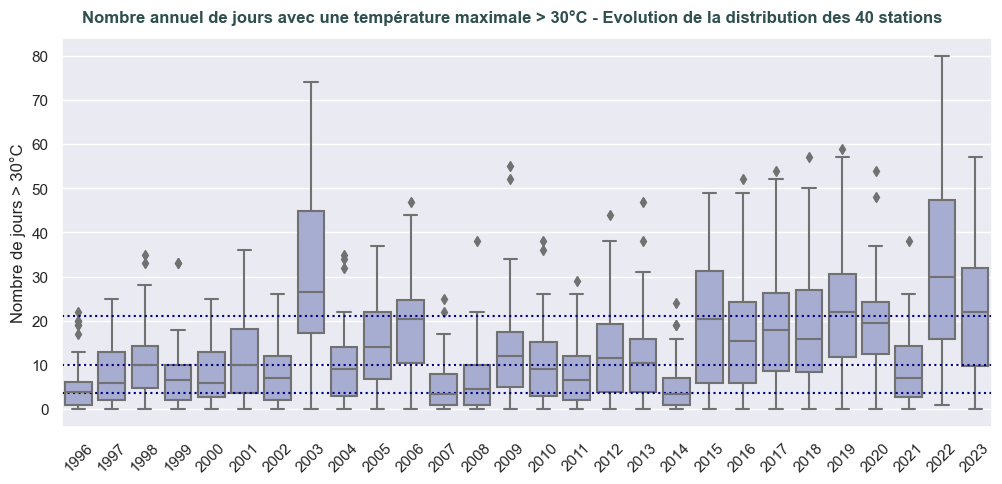

In [71]:
graph9

In [72]:
graph9.savefig("meteo_graphe9")

In [164]:
#Version pour graphe autonome

graph9bis=jours_sup30_quali["Boxplot"]["Année & Jours_sup30"]

#Redimensionnement
graph9bis.set_figwidth(12)

#Récupération des objets axes ( ici 1 seul élément)
ax=graph9bis.get_axes()

#Modifications des textes
ax[0].set_title("")
ax[0].set_ylabel("Nombre de jours > 30°C")
ax[0].set_xlabel("")


#Ajout des lignes de quantiles de l'ensemble des données
Q=df_annuel["Jours_sup30"].quantile([0.25,0.5,0.75])

plt.subplots_adjust(top=0.92)
plt.suptitle("Nombre annuel de jours avec une température maximale > 30°C - Evolution de la distribution des 40 stations",
             color=couleur_texte,size=12,fontweight="bold")

for i in range(3):
    ax[0].axhline(y= Q[Q.index[i]],xmin=0,xmax=1,color="navy",linestyle="dotted");

#Préparation du texte détaillé - pour graphe autonome
texte1 ="Informations :" + str(194*" ")
texte2 ="Source: https://donneespubliques.meteofrance.fr/ , données SYNOP essentielles OMM , depuis 1996. "
texte3 ="Les données sont disponibles pour 40 stations réparties sur l'ensemble du territoire , en latitude de Lille à Ajaccio et en longitude de Brest à Dijon."
texte4 ="La température maximale journalière est calculée sur 8 mesures , à partir de 0 heure toutes les 3 heures."
texte5 ="L'indicateur utilisé est le nombre de jours où la température maximale dépasse 30°C. "
texte6 ="Chaque boîte à moustaches représente la distribution des valeurs de l'indicateur des 40 stations pour l'année correspondante."

texte =texte1+"\n"+"\n"+texte2+"\n"+texte3[0:134]+"\n"+texte3[134:]+"\n"+texte4+"\n"+"\n"+texte5+"\n"+texte6+"\n"

In [165]:
props = dict(boxstyle='round', facecolor="lightgrey", alpha=0.5,pad=0.5)
ax[0].text(0.01, -0.2,texte,fontsize=11,transform=ax[0].transAxes, verticalalignment='top', bbox=props);


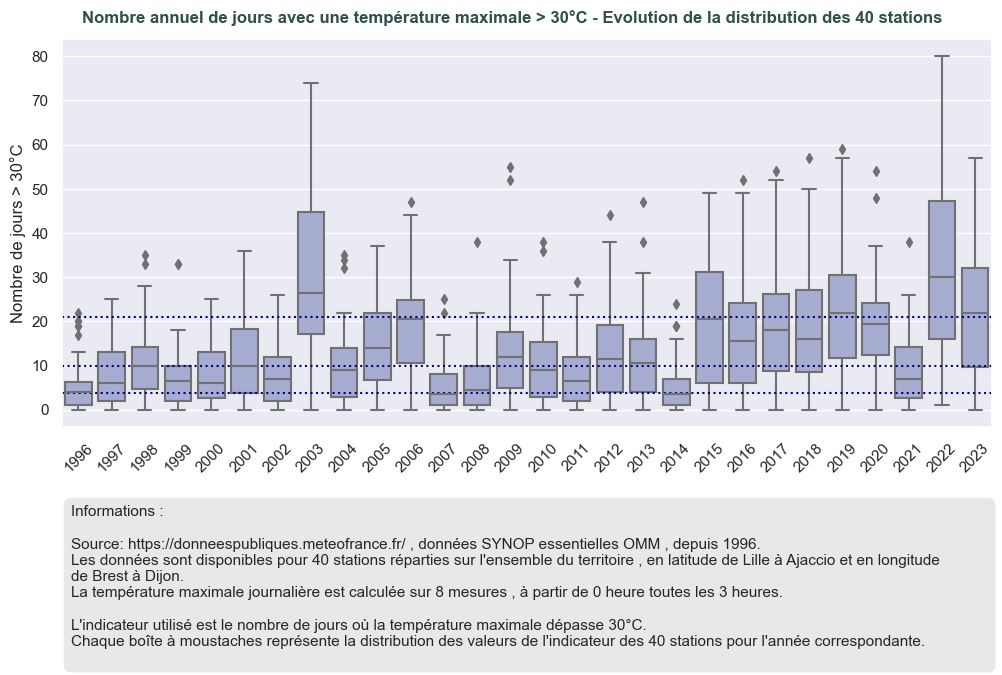

In [166]:
graph9bis

In [167]:
#Instruction bbbox_inches nécessaire pour avoir la boite sauvegardée dans l'image
graph9bis.savefig('graphique_jours_sup30°C.png',bbox_inches='tight')

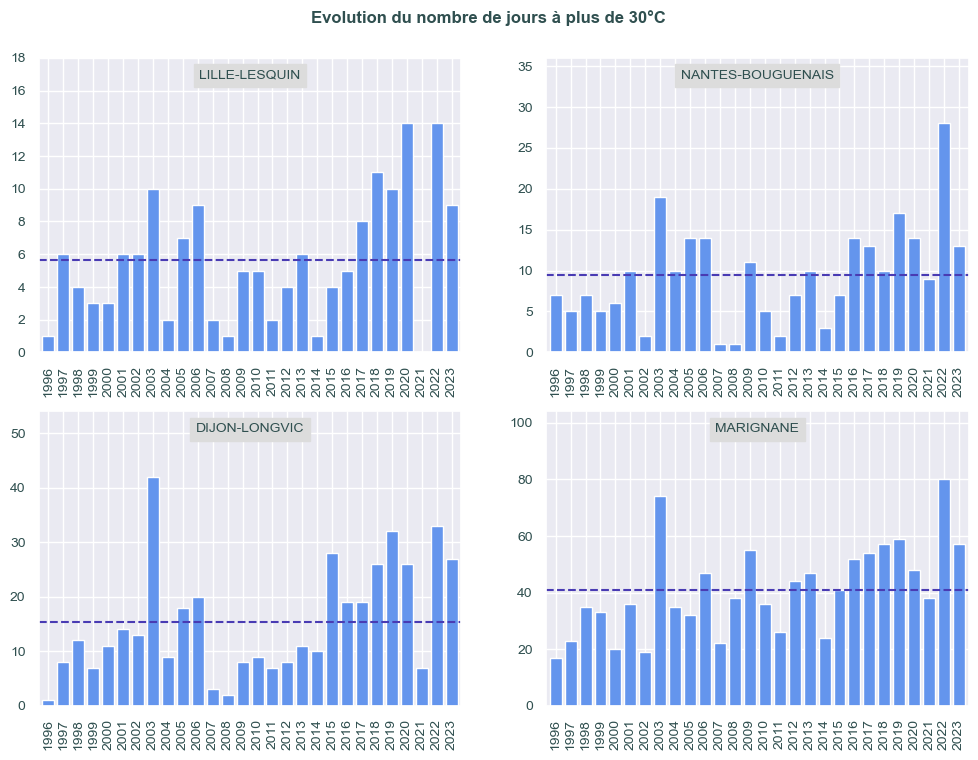

In [169]:
#Graphique d'évolution du nombre de jours > 30°C pour  4 stations

fig, ax = plt.subplots(figsize=(12,8))
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.set_axis_off()
nb_rg=2
nb_col=2

for i in range(4):
    ax = fig.add_subplot(nb_rg, nb_col, i+1)
    df=df_annuel[df_annuel["Station"]==liste_stations[i]]
    df=df.sort_values(by="Année",ascending=True).reset_index(drop=True)
    df.plot.bar(x="Année",y="Jours_sup30",color="cornflowerblue",ax=ax,legend=False,width=0.8)
    moyenne=df["Jours_sup30"].mean()
    plt.axhline(y=moyenne,color="#493bb3",linestyle="dashed")
    titre =str(df[df["Station"]==liste_stations[i]].iat[0,3])
    ax.set_title(titre,fontdict={'fontsize':10,'color':couleur_texte},pad=-15,backgroundcolor=couleur_boite)
    ech=np.floor(df["Jours_sup30"].max()*1.3)
    ax.set(ylim=(0,ech))
    plt.xlabel("")
    plt.xticks(rotation=90,color=couleur_texte,size=10)
    plt.yticks(color=couleur_texte,size=10)
                       
plt.subplots_adjust(top=0.92)
plt.suptitle("Evolution du nombre de jours à plus de 30°C",color=couleur_texte,size=12,fontweight="bold");

#graphe 8

fig.savefig("meteo_graphe8")

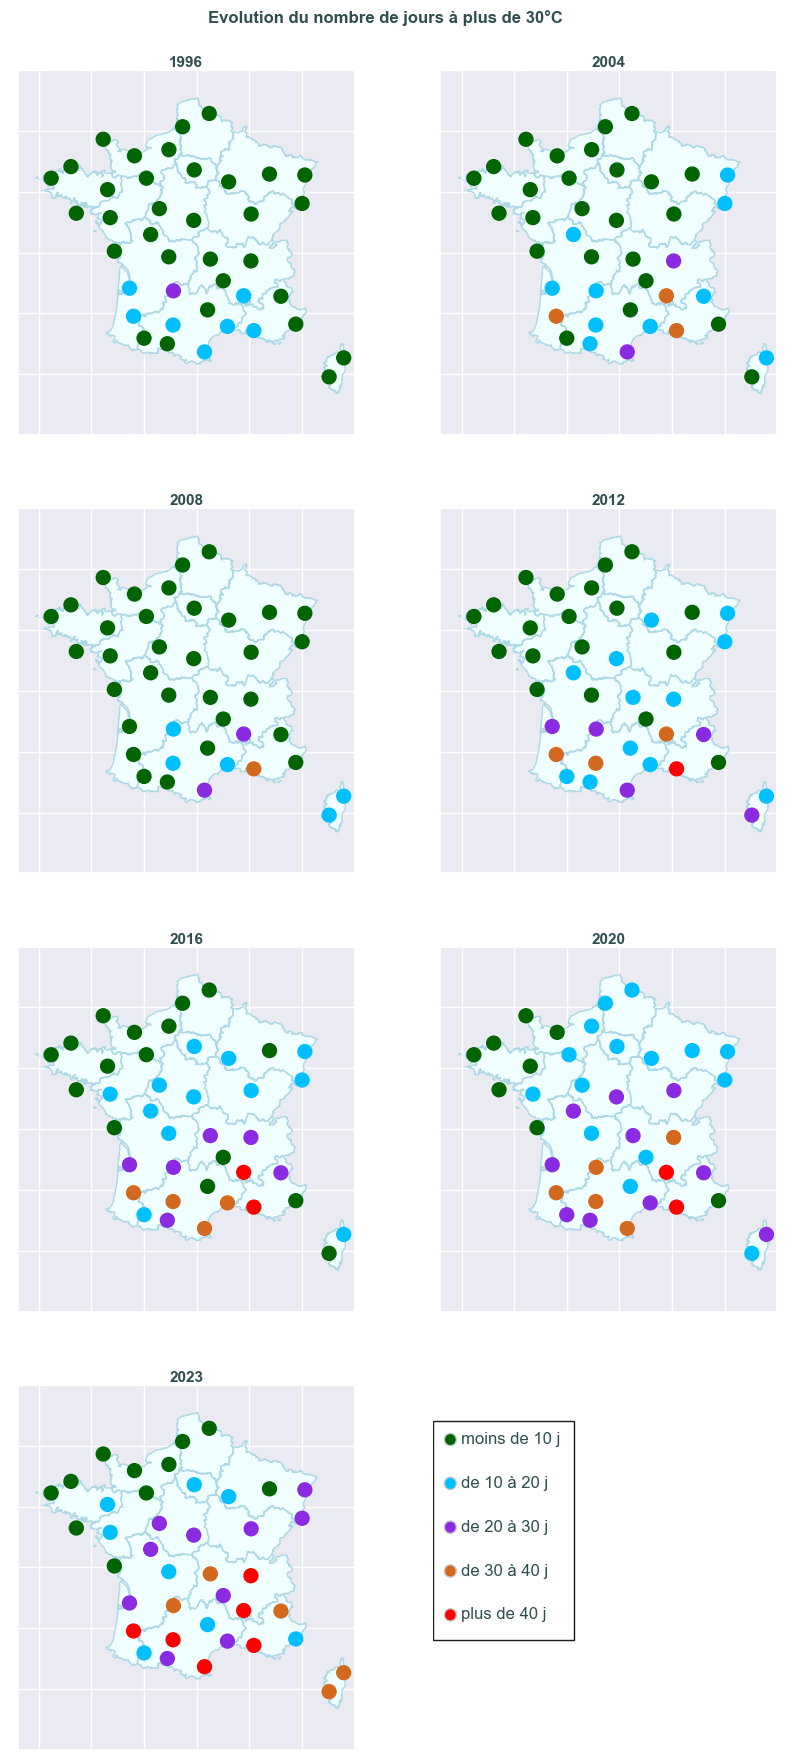

In [170]:
#Cartes simplifiées
from matplotlib.patches import Circle ,Rectangle

#Contour de carte des régions
régions=gpd.read_file(r"C:\DATA\contours_cartes\a-reg2020-geojson.json")
#Filtre pour enlever l'outremer
régions=régions[0:13]


fig, ax = plt.subplots(figsize=(10,20))

#Choix des années
liste_années=["1996","2004","2008","2012","2016","2020","2023"]
nb_an=len(liste_années)
nb_col=2
nb_rg=4

ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.set_axis_off()

for i in range(nb_an):
    ax = fig.add_subplot(nb_rg, nb_col, i+1)
    an=liste_années[i]
    df=df_annuel_geo[df_annuel_geo["Année"]==an].reset_index(drop=True)
    régions.plot(ax=ax,color="azure",edgecolor="lightblue",linewidth=1)
    couleurs=list(df["couleur"])
    labels=list(df["Classe_jours"])
    df.plot(ax=ax,markersize=100,marker="o",c=couleurs,label=labels,legend=True)
    ax.set_title(str(df["Année"][0]),fontdict={'fontsize':11,'color':couleur_texte,'fontweight':"bold"},pad=-15)
    ax.set(xlim=(-6,10),ylim=(40,52))
    ax.set_xticklabels([])
    ax.set_yticklabels([])


plt.subplots_adjust(top=0.95)
plt.suptitle("Evolution du nombre de jours à plus de 30°C",color=couleur_texte,size=12,fontweight="bold");

#Ajout du graphe de légende

ax=fig.add_subplot(nb_rg, nb_col, nb_an +1)
ax.add_patch( Rectangle(xy=(0, 0.3), width=0.4,height=0.6,facecolor="white", edgecolor='0.1') )

for i in range(5):
    col = i
    larg=0.12
    ax.add_patch(Circle(xy=(0.05,0.85-i*larg), radius=0.017, facecolor=df_couleurs["couleur"][i], edgecolor='0.8'))       
    ax.text(0.08,0.85-i*larg, df_couleurs["Classe_jours"][i], fontsize=12,
            horizontalalignment='left',verticalalignment='center',color=couleur_texte)

ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.set_axis_off()
ax.set_xticklabels([])
ax.set_yticklabels([]);

#graphe 10
fig.savefig("meteo_graphe10")

In [ ]:
#FIN ANALYSE